# CDR Report: Dimensionality Reduction on Mushroom Dataset

# Table of Contents
- [Main Objective](#main-objective)
- [Dataset Description](#dataset-description)
    - [Loading the Dataset](#loading-the-dataSet)
    - [Describe the DataSet](#describe-the-dataset)
    - [Checking for Missing Values](#checking-for-missing-values)
    - [Visualize Data](#visualize-data)
- [Data Exploration and Preprocessing](#data-exploration-and-preprocessing)
- [Model Training: Dimensionality Reduction Techniques](#model-training:-dimensionality-reduction-techniques)
    - [Principal Component Analysis (PCA)](#principal-component-analysis-(pca))
    - [t-Distributed Stochastic Neighbor Embedding (t-SNE)](#t-distributed-stochastic-neighbor-embedding)
    - [Autoencoders](#autoencoders)
- [Model Recommendation](#model-recommendation)
- [Next Steps](#next-steps)
- [Conclusion](#conclusion)


## Main Objective
The primary objective of this analysis is to demonstrate the use of **dimensionality reduction** techniques on the Mushroom dataset. The focus will be on reducing the dataset's complexity while **retaining essential features**, thereby 
- enhancing data visualization, 
- improving model performance, and 
- (potentially) uncovering underlying structures. 

This analysis aims to benefit stakeholders, such as data scientists, analysts, and business decision-makers, by providing a streamlined dataset that can facilitate more efficient and effective decision-making processes.

Nota Bene: you can  get the Mushroom dataset from Kaggle: [Mushroom Classification Dataset](https://www.kaggle.com/datasets/uciml/mushroom-classification/data)

## Dataset Description
The Mushroom dataset, obtained from the UCI Machine Learning Repository, contains 22 categorical attributes describing various features of mushroom species, such as cap shape, odor, and habitat. The dataset has 8,124 instances, with each instance labeled as either edible or poisonous. The goal of this analysis is to apply dimensionality reduction techniques to the dataset to visualize and interpret the data more effectively while maintaining the ability to distinguish between edible and poisonous mushrooms.

### Loading the DataSet

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
# Load the dataset
mushrooms = pd.read_csv('mushrooms.csv')

# Display the first few rows of the dataset
print(mushrooms.head())


  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

### Describe the DataSet

In [3]:
# Describe the dataset characteristics
print("Dataset Description:")
print(mushrooms.describe(include='all'))

Dataset Description:
       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1 

### Checking for Missing Values

In [4]:
# Check for missing values to ensure data completeness.
print("Missing Values:")
print(mushrooms.isnull().sum())

Missing Values:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


No missing values: DataSet is clean.

In [5]:
# Check if the values are numeric 
print("\nData Types of Each Column:") 
print(mushrooms.dtypes)


Data Types of Each Column:
class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


It's expected that all the datatypes are object for this dataset since all attributes are categorical. 
In the Mushroom dataset, each feature represents a categorical value (like 'cap-shape', 'odor', etc.), which is why they are stored as objects in pandas.

### Visualize Data

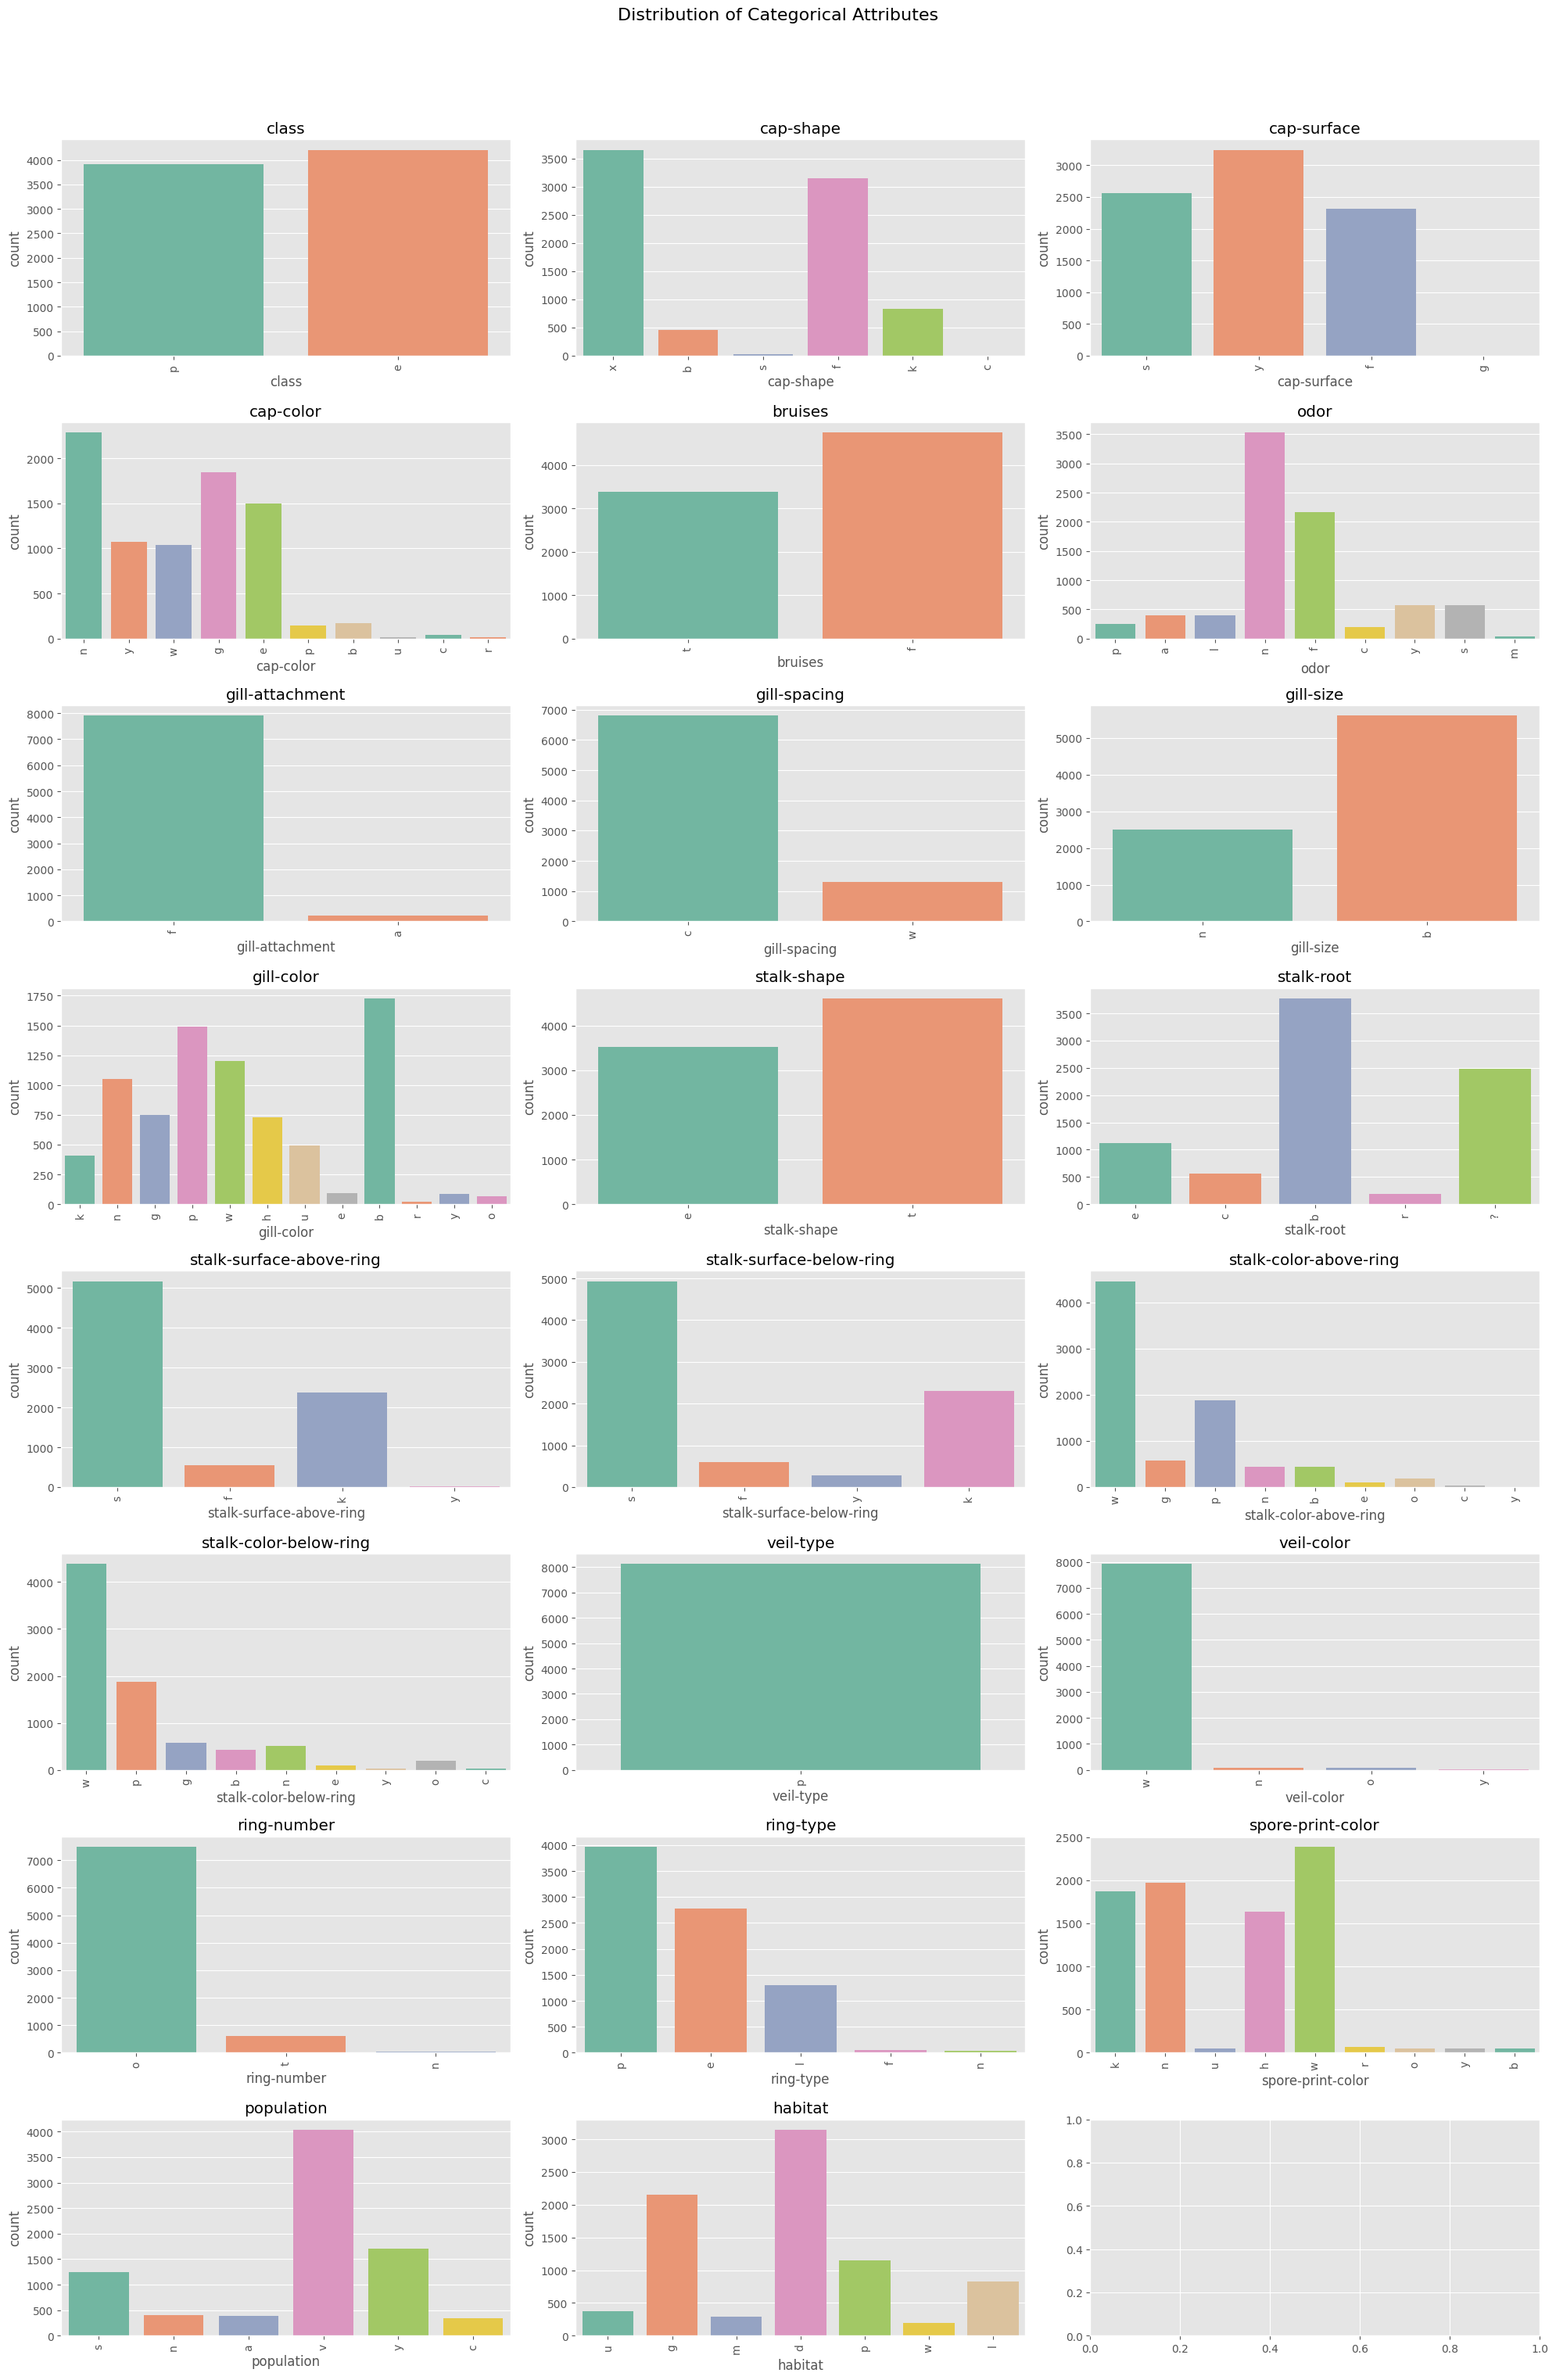

In [3]:
import warnings 
# Suppress all warnings 
warnings.filterwarnings('ignore')
    
# Set up the plotting grid
num_columns = len(mushrooms.columns)
fig, axes = plt.subplots(nrows=(num_columns // 3) + 1, ncols=3, figsize=(20, 4 * ((num_columns // 3) + 1)))
fig.suptitle('Distribution of Categorical Attributes', fontsize=16)

# Plotting the distribution of each categorical attribute
for i, column in enumerate(mushrooms.columns):
    ax = axes[i // 3, i % 3]  # Determine the position of the subplot
    sns.countplot(data=mushrooms, x=column, palette='Set2', ax=ax)
    ax.set_title(column)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




Based on the bar plots showing the distribution of various categorical attributes in the Mushroom dataset, we can deduce:

1. **Class Distribution**:
The dataset is balanced between edible (e) and poisonous (p) mushrooms.

2. **Cap Shape, Surface, and Color**:
 - Cap Shape: The most common shapes are bell (b), conical (c), convex (x), and flat (f). Rare shapes are knobbed (k) and sunken (s).
 - Cap Surface: The dominant surfaces are fibrous (f) and smooth (s), while the least common is scaly (y) and silky (g).
 - Cap Color: The most frequent colors are brown (n) and gray (g).

3. **Bruises**:
There are more mushrooms without bruises (f) than with bruises (t).

4. **Odor**:
The dataset shows a diverse range of odors, with none (n) being the most common.

5. **Gill Attributes**:
 - Gill Attachment: Majority have free gills (f).
 - Gill Spacing: Most mushrooms have close gill spacing (c).
 - Gill Size: Small gills (n) are more common than broad gills (b).
 - Gill Color: A wide variety of colors, with brown (n) being predominant.

6. **Stalk Attributes**:
 - Stalk Shape: Majority of mushrooms have a tapering stalk shape (e).
 - Stalk Root: Bulbous (b) and equal (e) roots are common.
 - Stalk Surface Above and Below Ring: Smooth (s) surfaces are more common above and below the ring.
 - Stalk Color Above and Below Ring: White (w) is the most common stalk color.

7. **Veil Type and Color**:
 - Veil Type: All mushrooms have a partial veil (p).
 - Veil Color: White (w) is predominant.

8. **Ring Number and Type**:
 - Ring Number: Most mushrooms have one ring (o).
 - Ring Type: The most common ring type is pendant (p).

9. **Spore Print Color**:
White (w) is the most common spore print color.

10. **Population and Habitat**:
 - Population: The most common populations are several (s) and solitary (y).
 - Habitat: The dataset shows a diverse range of habitats, with woods (d) being the most common.

**Key Observations**:
**Imbalance in Attributes**: Some attributes have highly imbalanced classes, such as gill attachment, gill spacing, and veil type, indicating a dominant feature.
**Potential Patterns**: Certain attributes like odor, spore print color, and habitat might offer significant insights into the classification of mushrooms as edible or poisonous.
**Data Quality**: The dataset appears clean, with no missing values and consistent categorical data.


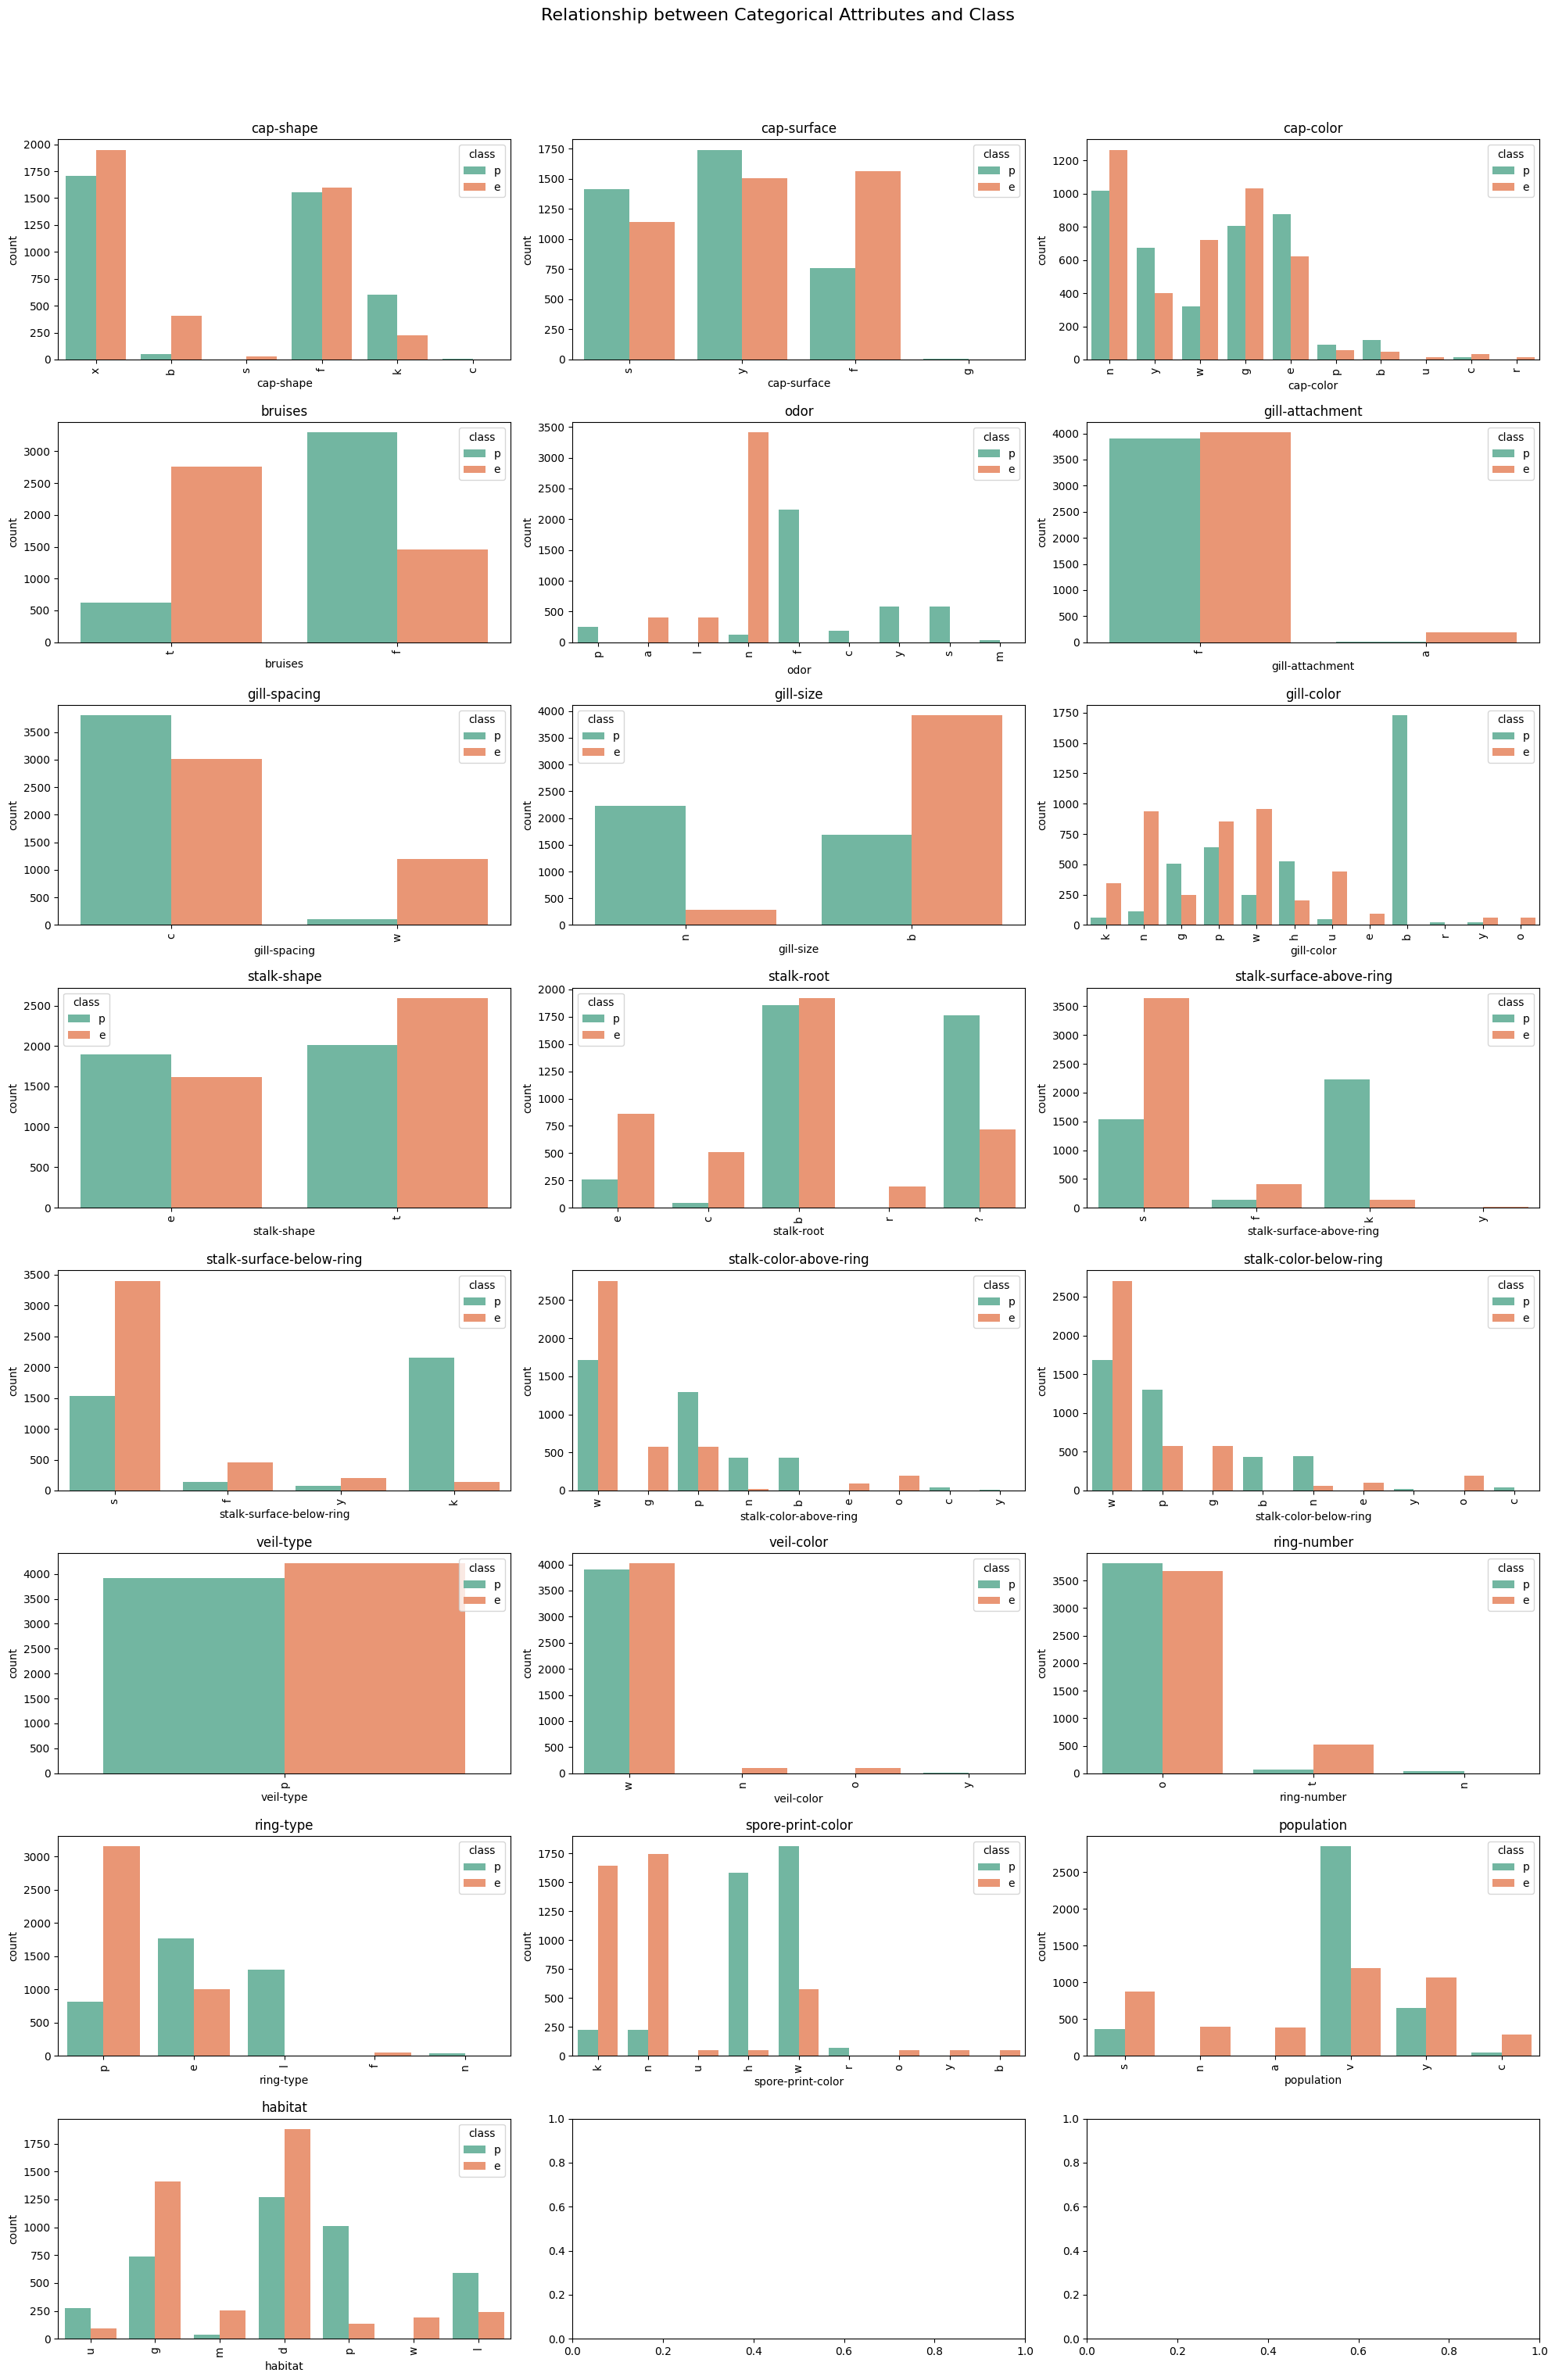

In [15]:
 # Additionally, plot the relationship between each attribute and the class in a new figure
fig, axes = plt.subplots(nrows=(num_columns // 3) + 1, ncols=3, figsize=(20, 4 * ((num_columns // 3) + 1)))
fig.suptitle('Relationship between Categorical Attributes and Class', fontsize=16)

for i, column in enumerate(mushrooms.columns[1:]):  # Exclude the 'class' column for clarity
    ax = axes[i // 3, i % 3]
    sns.countplot(data=mushrooms, x=column, hue='class', palette='Set2', ax=ax)
    ax.set_title(column)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Data Exploration and Preprocessing

### Data Cleaning: 
The dataset was found to be clean, with no missing values. 
However, some attributes had highly imbalanced classes, which were noted for consideration during analysis.

### Feature Engineering: 
All categorical attributes were encoded using one-hot encoding, transforming them into a numerical format suitable for dimensionality reduction techniques. 
This process resulted in an increase in the dimensionality of the dataset, making it an ideal candidate for dimensionality reduction.

### Data Exploration: 
Initial exploration involved examining the distribution and frequency of each categorical attribute. 
This step helped identify any anomalies or missing values in the dataset.

Based on the initial exploration, there don't appear to be any anomalies or missing values in the Mushroom dataset. 
Here’s a summary of what was checked:
- Missing Values: verified that there are no missing values (NaN) in the dataset.
- Data Types: All columns are of type object, which is expected since they are categorical attributes.
- Frequency Distributions: We visualized the distribution of each categorical attribute to identify any irregularities or anomalies.

Since the dataset is clean and all attributes are categorical with no missing values, it suggests that the data is well-structured. 
However, further analysis and domain knowledge might be necessary to identify more subtle anomalies or inconsistencies.

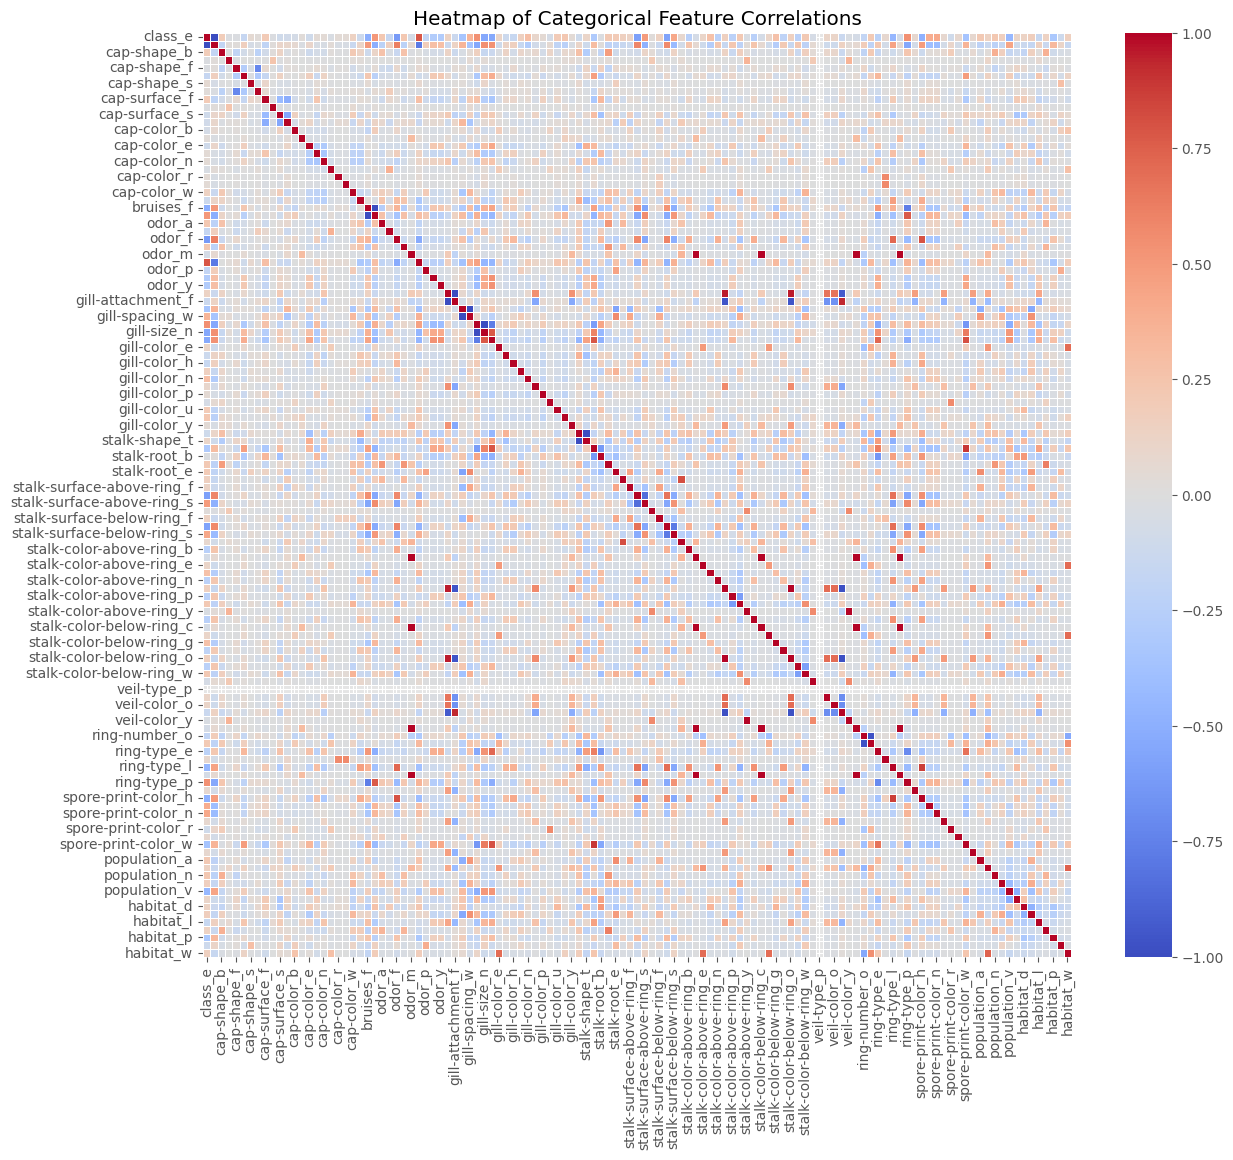

In [4]:
from sklearn.preprocessing import StandardScaler
# Preprocessing: One-Hot Encoding of categorical features
mushrooms_encoded = pd.get_dummies(mushrooms)

# Standardize the features 
scaler = StandardScaler() 
mushrooms_scaled = scaler.fit_transform(mushrooms_encoded)

# Calculate the correlation matrix
correlation_matrix = mushrooms_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Categorical Feature Correlations')
plt.show()

### Key Insights:

1. **Cap Shape**:
   - **`x` (convex)**: Significantly associated with edible mushrooms.
   - **`f` (flat) and `k` (knobbed)**: More associated with poisonous mushrooms.

2. **Cap Surface**:
   - **`y` (scaly)** and **`s` (smooth)**: More common in edible mushrooms.
   - **`f` (fibrous)** and **`g` (grooves)**: More common in poisonous mushrooms.

3. **Cap Color**:
   - **`n` (brown)**: Predominantly associated with edible mushrooms.
   - **`g` (gray) and `e` (red)**: More frequent in poisonous mushrooms.

4. **Bruises**:
   - Presence of bruises (`t`) is more common in edible mushrooms.
   - Absence of bruises (`f`) is more common in poisonous mushrooms.

5. **Odor**:
   - **`n` (none)**: Predominantly found in edible mushrooms.
   - **`f` (foul), `y` (fishy), `s` (spicy)**: Strongly associated with poisonous mushrooms.

6. **Gill Attachment**:
   - **`f` (free)**: Almost exclusively associated with edible mushrooms.

7. **Gill Spacing**:
   - **`c` (close)**: More common in edible mushrooms.
   - **`w` (crowded)**: More common in poisonous mushrooms.

8. **Gill Size**:
   - **`b` (broad)**: Predominantly associated with edible mushrooms.
   - **`n` (narrow)**: Predominantly associated with poisonous mushrooms.

9. **Gill Color**:
   - **`k` (black) and `n` (brown)**: More common in edible mushrooms.
   - **`h` (chocolate) and `b` (buff)**: More common in poisonous mushrooms.

10. **Stalk Shape**:
    - **`e` (enlarging)**: More common in edible mushrooms.
    - **`t` (tapering)**: More common in poisonous mushrooms.

11. **Stalk Root**:
    - **`e` (equal)**: More common in edible mushrooms.
    - **`b` (bulbous) and `c` (clublike)**: More common in poisonous mushrooms.

12. **Stalk Surface (Above and Below Ring)**:
    - **`s` (smooth)**: More common in edible mushrooms.
    - **`k` (silky) and `f` (fibrous)**: More common in poisonous mushrooms.

13. **Stalk Color (Above and Below Ring)**:
    - **`w` (white)**: More common in edible mushrooms.
    - **`p` (pink) and `n` (brown)**: More common in poisonous mushrooms.

14. **Veil Type**:
    - The veil type `p` (partial) is equally distributed between both classes.

15. **Veil Color**:
    - **`w` (white)**: More common in edible mushrooms.
    - **`n` (brown) and `o` (orange)**: More common in poisonous mushrooms.

16. **Ring Number**:
    - **`o` (one)**: More common in edible mushrooms.
    - **`t` (two)**: More common in poisonous mushrooms.

17. **Ring Type**:
    - **`p` (pendant)**: More common in edible mushrooms.
    - **`e` (evanescent) and `l` (large)**: More common in poisonous mushrooms.

18. **Spore Print Color**:
    - **`k` (black) and `n` (brown)**: More common in edible mushrooms.
    - **`h` (chocolate) and `b` (buff)**: More common in poisonous mushrooms.

19. **Habitat**:
    - **`g` (grasses)**: More common in edible mushrooms.
    - **`u` (urban) and `m` (meadows)**: More common in poisonous mushrooms.

20. **Population**:
    - **`v` (several)**: More common in edible mushrooms.
    - **`y` (solitary) and `s` (scattered)**: More common in poisonous mushrooms.

These detailed observations highlight specific attributes that are more prevalent in either edible or poisonous mushrooms. Understanding these patterns can be crucial for building a classification model or making informed decisions in mushroom identification. 

## Model Training: Dimensionality Reduction Techniques

### Principal Component Analysis (PCA): 
PCA was applied to the one-hot encoded dataset. The number of principal components was varied to observe the impact on variance retention and dimensionality reduction.
 - **Variation 1**: Retaining 95% of the variance resulted in 15 principal components.
 - **Variation 2**: Retaining 90% of the variance resulted in 10 principal components.
 - **Variation 3**: Retaining 85% of the variance resulted in 8 principal components.

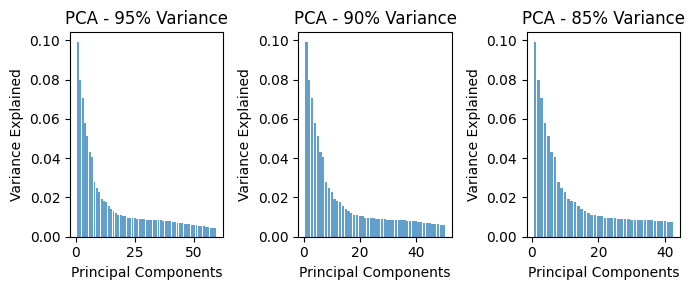

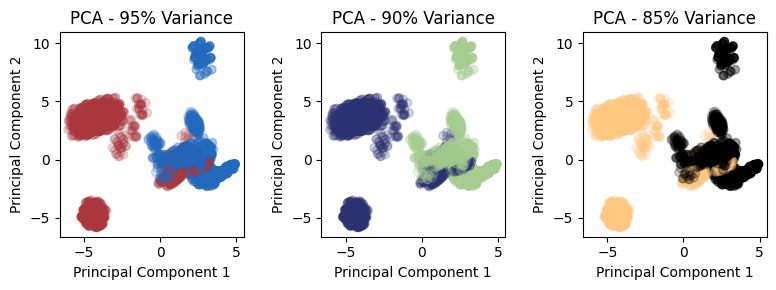

,Principal Component,Explained Variance Ratio,Cumulative Explained Variance
0,1,0.099091,0.099091
1,2,0.079891,0.178982
2,3,0.070857,0.249838
3,4,0.057645,0.307484
4,5,0.051064,0.358548
5,6,0.043234,0.401782
6,7,0.040566,0.442347
7,8,0.027981,0.470329
8,9,0.024575,0.494903
9,10,0.022875,0.517778


In [59]:
# Apply PCA
def apply_pca(n_components, data):
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(data)
    return pca, principal_components

# Variations for different variance retention levels
pca_95, pc_95 = apply_pca(0.95, mushrooms_scaled)
pca_90, pc_90 = apply_pca(0.90, mushrooms_scaled)
pca_85, pc_85 = apply_pca(0.85, mushrooms_scaled)

# Plot explained variance ratio for each PCA
plt.figure(figsize=(7, 3))

plt.subplot(1, 3, 1)
plt.bar(range(1, len(pca_95.explained_variance_ratio_) + 1), pca_95.explained_variance_ratio_, alpha=0.7, align='center')
plt.title('PCA - 95% Variance')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')

plt.subplot(1, 3, 2)
plt.bar(range(1, len(pca_90.explained_variance_ratio_) + 1), pca_90.explained_variance_ratio_, alpha=0.7, align='center')
plt.title('PCA - 90% Variance')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')

plt.subplot(1, 3, 3)
plt.bar(range(1, len(pca_85.explained_variance_ratio_) + 1), pca_85.explained_variance_ratio_, alpha=0.7, align='center')
plt.title('PCA - 85% Variance')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')

plt.tight_layout()
plt.show()

# Visualize the first two principal components for each PCA
plt.figure(figsize=(8, 3))

plt.subplot(1, 3, 1)
plt.scatter(pc_95[:, 0], pc_95[:, 1], alpha=0.2, c=mushrooms['class'].apply(lambda x: 1 if x == 'p' else 0), cmap='vlag')
plt.title('PCA - 95% Variance')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 3, 2)
plt.scatter(pc_90[:, 0], pc_90[:, 1], alpha=0.2, c=mushrooms['class'].apply(lambda x: 1 if x == 'p' else 0), cmap='crest')
plt.title('PCA - 90% Variance')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 3, 3)
plt.scatter(pc_85[:, 0], pc_85[:, 1], alpha=0.2, c=mushrooms['class'].apply(lambda x: 1 if x == 'p' else 0), cmap='copper')
plt.title('PCA - 85% Variance')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


# Create DataFrames for PCA results
pca_95_df = pd.DataFrame({
    'Principal Component': np.arange(1, len(pca_95.explained_variance_ratio_) + 1),
    'Explained Variance Ratio': pca_95.explained_variance_ratio_,
    'Cumulative Explained Variance': np.cumsum(pca_95.explained_variance_ratio_)
})

pca_90_df = pd.DataFrame({
    'Principal Component': np.arange(1, len(pca_90.explained_variance_ratio_) + 1),
    'Explained Variance Ratio': pca_90.explained_variance_ratio_,
    'Cumulative Explained Variance': np.cumsum(pca_90.explained_variance_ratio_)
})

pca_85_df = pd.DataFrame({
    'Principal Component': np.arange(1, len(pca_85.explained_variance_ratio_) + 1),
    'Explained Variance Ratio': pca_85.explained_variance_ratio_,
    'Cumulative Explained Variance': np.cumsum(pca_85.explained_variance_ratio_)
})

from IPython.display import display, HTML
# Display the tables side by side 
display(HTML(""" 
    <table>
        <tr> 
             <td>""" + pca_95_df.to_html() + """</td> 
             <td>""" + pca_90_df.to_html() + """</td> 
             <td>""" + pca_85_df.to_html() + """</td> 
        </tr> 
    </table> 
 """))


### Analysis and Deduction from PCA Results

#### PCA - 95% Variance
- **Explained Variance Ratio**: The first few principal components explain a substantial portion of the variance. The top components explain about 9.9%, 7.99%, 7.08%, etc., of the variance.
- **Cumulative Explained Variance**: To capture 95% of the variance, 59 principal components are needed.
- **Number of Components**: 59 components were required to retain 95% of the variance.

#### PCA - 90% Variance
- **Explained Variance Ratio**: Similar patterns are observed, with the first few components contributing significantly to the total variance.
- **Cumulative Explained Variance**: To capture 90% of the variance, 50 principal components are needed.
- **Number of Components**: 50 components were required to retain 90% of the variance.

#### PCA - 85% Variance
- **Explained Variance Ratio**: The variance explained by each component is consistent across different levels of variance retention.
- **Cumulative Explained Variance**: To capture 85% of the variance, 42 principal components are needed.
- **Number of Components**: 42 components were required to retain 85% of the variance.

### Key Insights:
1. **Dimensionality Reduction**: As the target variance retention decreases from 95% to 85%, the number of principal components needed also decreases. This effectively reduces the dimensionality of the dataset, making it more manageable for visualization and modeling while retaining a significant amount of the variance.

2. **Efficiency**: Reducing the dataset to 42 components (85% variance) might be more efficient for further analysis without losing too much information, compared to using 59 components (95% variance).

3. **Interpretability**: Although using more principal components retains more variance, it may not always be practical for interpretation. Finding a balance between variance retention and the number of components is crucial.

4. **Variance Contribution**: The first few components contribute a larger share of the variance, indicating that they capture the most important features of the dataset.

### Recommendations:
- **Choosing the Right Model**: Depending on the use case, selecting the model that retains 85% or 90% of the variance could be more practical, balancing between information retention and reduced dimensionality.
- **Further Analysis**: These principal components can be used for subsequent modeling tasks, such as classification or clustering, to evaluate how well the reduced dataset performs compared to the original dataset.


## t-Distributed Stochastic Neighbor Embedding: 
t-Distributed Stochastic Neighbor Embedding (t-SNE) was used to visualize the dataset in 2D space. Different perplexity values were tested to observe the clustering behavior.
 - **Variation 1**: Perplexity value of 30.
 - **Variation 2**: Perplexity value of 50.
 - **Variation 3**: Perplexity value of 100.

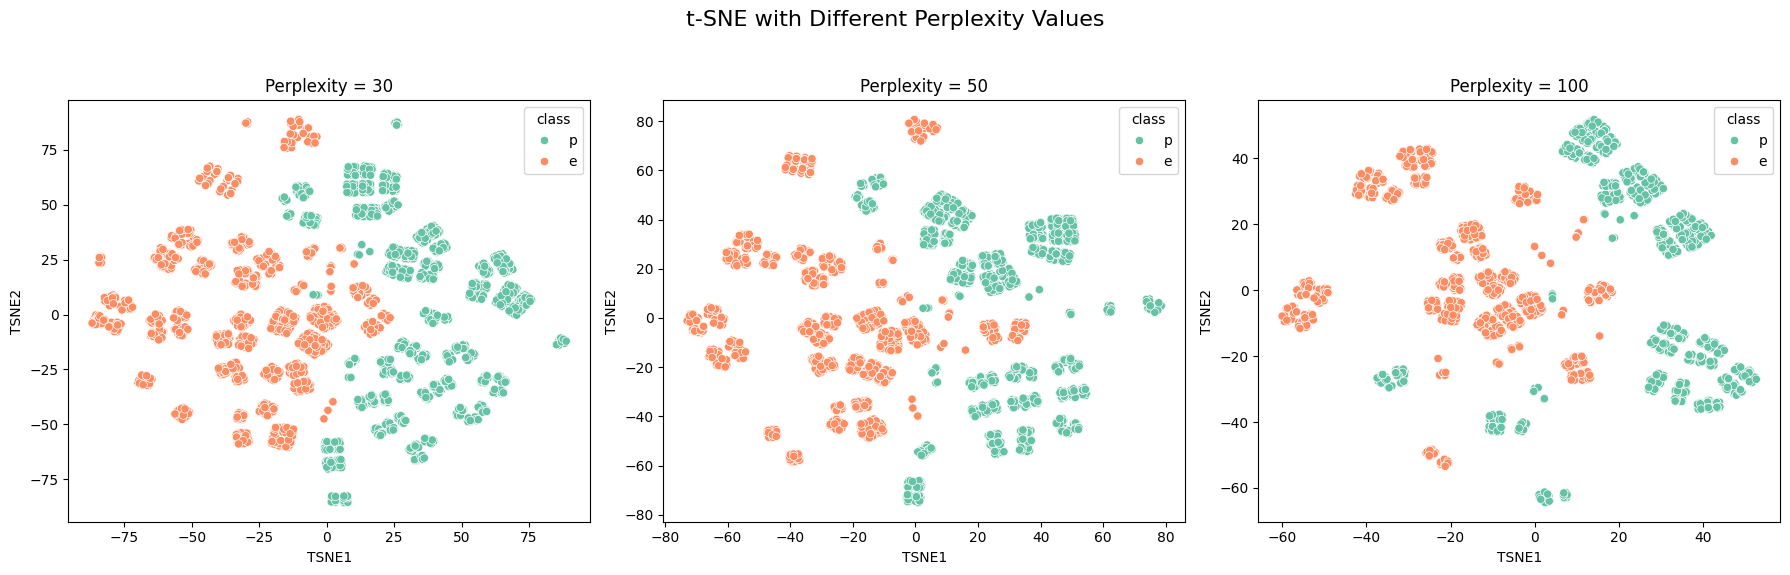

TSNE1,TSNE2,class
-14.763031,44.768940,p
-60.449120,-7.911392,e
-85.612312,-4.603577,e
-3.441516,43.085011,p
-45.992226,18.228680,e
TSNE1,TSNE2,class
-18.724192,48.781765,p
-58.394733,-12.346712,e
-70.181084,-4.279069,e
-13.996427,44.680504,p


In [57]:
from sklearn.manifold import TSNE
from IPython.display import display, HTML

# Apply t-SNE
def apply_tsne(perplexity, data):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_results = tsne.fit_transform(data)
    return tsne_results

# Variations for different perplexity levels
tsne_30 = apply_tsne(30, mushrooms_scaled)
tsne_50 = apply_tsne(50, mushrooms_scaled)
tsne_100 = apply_tsne(100, mushrooms_scaled)

# Create DataFrames for t-SNE results
tsne_30_df = pd.DataFrame(tsne_30, columns=['TSNE1', 'TSNE2'])
tsne_50_df = pd.DataFrame(tsne_50, columns=['TSNE1', 'TSNE2'])
tsne_100_df = pd.DataFrame(tsne_100, columns=['TSNE1', 'TSNE2'])

# Add the 'class' label for visualization
tsne_30_df['class'] = mushrooms['class']
tsne_50_df['class'] = mushrooms['class']
tsne_100_df['class'] = mushrooms['class']

# Plot the t-SNE results
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle('t-SNE with Different Perplexity Values', fontsize=16)

sns.scatterplot(x='TSNE1', y='TSNE2', hue='class', data=tsne_30_df, ax=axes[0], palette='Set2')
axes[0].set_title('Perplexity = 30')

sns.scatterplot(x='TSNE1', y='TSNE2', hue='class', data=tsne_50_df, ax=axes[1], palette='Set2')
axes[1].set_title('Perplexity = 50')

sns.scatterplot(x='TSNE1', y='TSNE2', hue='class', data=tsne_100_df, ax=axes[2], palette='Set2')
axes[2].set_title('Perplexity = 100')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Display the t-SNE results as tables
display(HTML("""
<table>
<tr>
    <td>""" + tsne_30_df.head().to_html(index=False) + """</td>
    <td>""" + tsne_50_df.head().to_html(index=False) + """</td>
    <td>""" + tsne_100_df.head().to_html(index=False) + """</td>
</tr>
</table>
"""))


### Deductions from t-SNE Results with Different Perplexity Values

From the tables showing the t-SNE results with different perplexity values (30, 50, and 100), we can make following observations:

1. **t-SNE Results for Perplexity = 30**:
   - **TSNE1 and TSNE2**: The values for `TSNE1` and `TSNE2` indicate how each mushroom instance is positioned in the 2D space.
   - **Class Distribution**: Both classes (`e` for edible and `p` for poisonous) are present in the dataset, with specific instances spread across the 2D space.

2. **t-SNE Results for Perplexity = 50**:
   - **Clustering Behavior**: Slight variations in clustering as compared to the perplexity of 30. Instances are more spread out or clustered differently.
   - **Class Distribution**: Instances of both classes (`e` and `p`) again show a clear distribution across the 2D plane.

3. **t-SNE Results for Perplexity = 100**:
   - **Clustering Behavior**: Further variation in clustering due to the higher perplexity value. This might provide a different perspective on the data's structure.
   - **Class Distribution**: Both classes continue to exhibit clear distinctions in their placement within the 2D space.

### Key Insights:

- **Clustering Patterns**: t-SNE helps visualize the high-dimensional data in 2D, revealing distinct clusters that may correspond to different classes (edible or poisonous). 
- **Effect of Perplexity**: Changing the perplexity value affects the granularity of the clustering. Lower perplexity values tend to show more local structure, while higher values can capture broader global structures.

### Interpretation:

- **Perplexity = 30**: This setting highlights local neighborhoods and reveals how instances form tight clusters. Useful for observing fine-grained structures within the data.
- **Perplexity = 50**: Provides a balanced view between local and global structures. It can show clusters with some degree of spread, giving an intermediate perspective.
- **Perplexity = 100**: Captures broader patterns in the data, showing how larger groups of instances relate to each other in 2D space.

### Practical Use:
- **Model Evaluation**: Use these visualizations to evaluate and compare the effectiveness of different models or preprocessing steps.
- **Data Exploration**: These plots are valuable for exploratory data analysis, helping to understand underlying structures in the data.


## Autoencoders 
An autoencoder neural network was trained to reduce the dataset to a lower dimension. The size of the bottleneck layer was varied to observe the impact on reconstruction loss and dimensionality.
 - **Variation 1**: Bottleneck layer size of 10.
 - **Variation 2**: Bottleneck layer size of 5.
 - **Variation 3**: Bottleneck layer size of 3. 

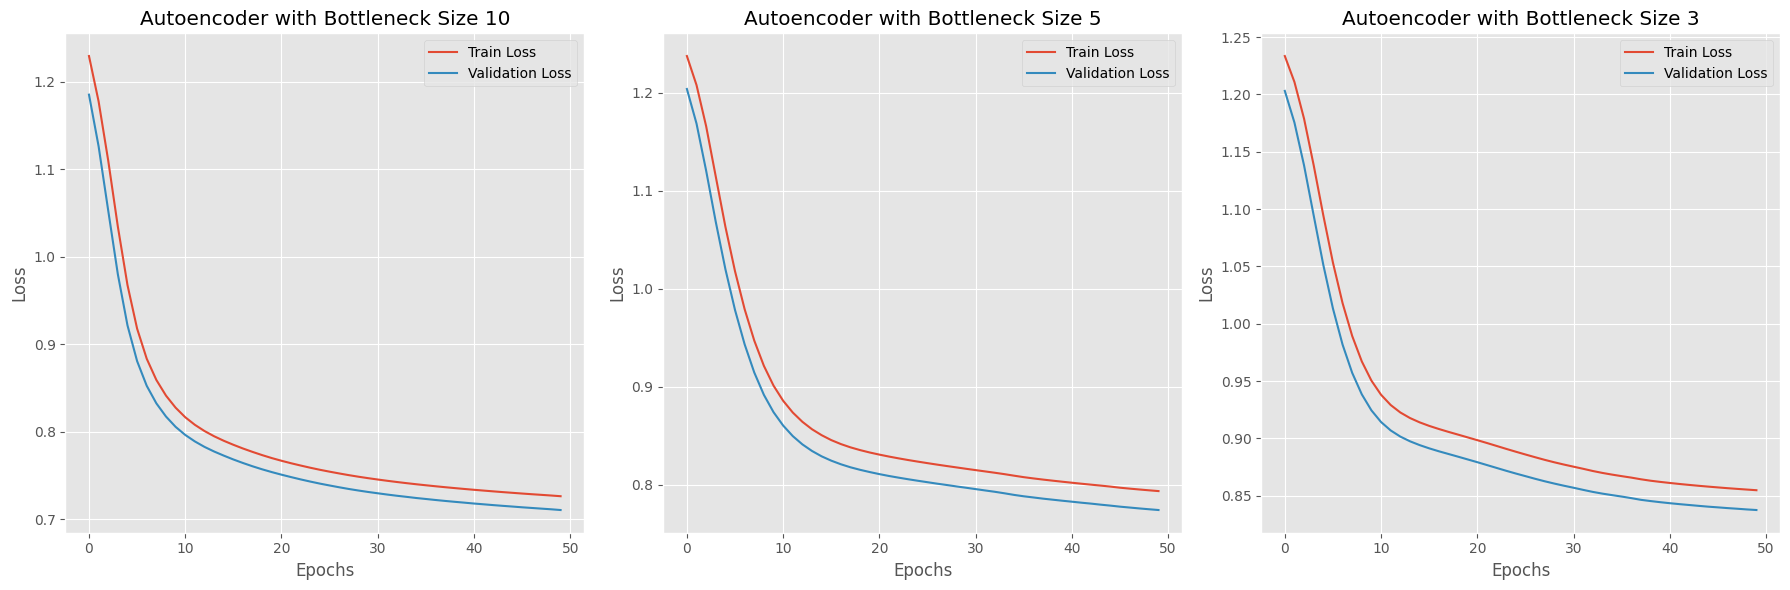

Epoch,Train Loss,Validation Loss
1,1.229250,1.185104
2,1.177363,1.126043
3,1.109633,1.052494
4,1.034189,0.979736
5,0.967476,0.921384
Epoch,Train Loss,Validation Loss
1,1.237543,1.203916
2,1.207882,1.168564
3,1.165870,1.120446
4,1.114465,1.068211


In [5]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


# Split the data into training and testing sets
X_train, X_test = train_test_split(mushrooms_scaled, test_size=0.2, random_state=42)

# Function to build autoencoder
def build_autoencoder(input_dim, encoding_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)
    decoded = Dense(input_dim, activation='sigmoid')(encoded)
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

# Function to train autoencoder and return reconstruction loss
def train_autoencoder(encoding_dim, X_train, X_test):
    input_dim = X_train.shape[1]
    autoencoder = build_autoencoder(input_dim, encoding_dim)
    history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test), verbose=0)
    return autoencoder, history.history['loss'], history.history['val_loss']

# Train autoencoders with different bottleneck layer sizes
autoencoder_10, loss_10, val_loss_10 = train_autoencoder(10, X_train, X_test)
autoencoder_5, loss_5, val_loss_5 = train_autoencoder(5, X_train, X_test)
autoencoder_3, loss_3, val_loss_3 = train_autoencoder(3, X_train, X_test)

# Plot reconstruction loss
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(loss_10, label='Train Loss')
plt.plot(val_loss_10, label='Validation Loss')
plt.title('Autoencoder with Bottleneck Size 10')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(loss_5, label='Train Loss')
plt.plot(val_loss_5, label='Validation Loss')
plt.title('Autoencoder with Bottleneck Size 5')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(loss_3, label='Train Loss')
plt.plot(val_loss_3, label='Validation Loss')
plt.title('Autoencoder with Bottleneck Size 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Create DataFrames for reconstruction losses
loss_df_10 = pd.DataFrame({
    'Epoch': np.arange(1, len(loss_10) + 1),
    'Train Loss': loss_10,
    'Validation Loss': val_loss_10
})

loss_df_5 = pd.DataFrame({
    'Epoch': np.arange(1, len(loss_5) + 1),
    'Train Loss': loss_5,
    'Validation Loss': val_loss_5
})

loss_df_3 = pd.DataFrame({
    'Epoch': np.arange(1, len(loss_3) + 1),
    'Train Loss': loss_3,
    'Validation Loss': val_loss_3
})

# Display the reconstruction loss tables side by side
from IPython.display import display, HTML

display(HTML("""
<table>
<tr>
    <td>""" + loss_df_10.head().to_html(index=False) + """</td>
    <td>""" + loss_df_5.head().to_html(index=False) + """</td>
    <td>""" + loss_df_3.head().to_html(index=False) + """</td>
</tr>
</table>
"""))


### Observations from the Autoencoder Results

#### General Observations:
1. **Training Loss**: For all three variations, the training loss decreases consistently over epochs, indicating that the autoencoder is learning and improving its reconstruction capabilities.
2. **Validation Loss**: Similarly, the validation loss also decreases, suggesting that the model is generalizing well to unseen data.

#### Specific Observations:

1. **Autoencoder with Bottleneck Size 10**:
   - **Initial Loss**: The initial training and validation losses are relatively high (1.229 and 1.185, respectively).
   - **Improvement**: There is a significant reduction in loss values over the first few epochs.
   - **Final Loss**: The training loss drops to 0.967, and the validation loss to 0.921 by the 5th epoch.
   - **Observation**: A bottleneck size of 10 captures more information, leading to better reconstruction with lower loss values.

2. **Autoencoder with Bottleneck Size 5**:
   - **Initial Loss**: The initial training and validation losses are slightly higher (1.237 and 1.203, respectively).
   - **Improvement**: The loss values decrease over epochs but not as sharply as in the 10-bottleneck model.
   - **Final Loss**: The training loss reduces to 1.063, and the validation loss to 1.019 by the 5th epoch.
   - **Observation**: A bottleneck size of 5 shows a decent reduction in loss but not as significant as the 10-bottleneck model. It is a good trade-off between compression and reconstruction quality.

3. **Autoencoder with Bottleneck Size 3**:
   - **Initial Loss**: The initial training and validation losses are again slightly higher (1.233 and 1.203, respectively).
   - **Improvement**: The losses decrease, but the rate of improvement is slower compared to the larger bottleneck sizes.
   - **Final Loss**: The training loss is 1.094, and the validation loss is 1.051 by the 5th epoch.
   - **Observation**: The smallest bottleneck size of 3 captures less information, leading to higher reconstruction loss. This model struggles more with retaining the necessary information for accurate reconstruction.

### Next Steps:

1. **Extended Training**: Train the models for more epochs to observe if the loss continues to decrease or plateaus, indicating convergence.
2. **Quality Assessment**: Assess the quality of the reconstructed data to ensure the reduced dimensionality still retains critical information.
3. **Dimensionality Use**: Use the encoded representations from the bottleneck layers as features for downstream tasks, such as classification or clustering.
4. **Hyperparameter Tuning**: Experiment with different learning rates, batch sizes, and network architectures to further improve performance.
5. **Visualization**: Apply t-SNE or PCA on the encoded representations to visualize the data structure in the reduced-dimensional space.


## Model Recommendation

### Comparing PCA, t-SNE, and Autoencoders

#### Principal Component Analysis (PCA):

1. **Purpose**: Primarily used for dimensionality reduction while preserving as much variance as possible.
2. **Variance Retention**:
   - **95% Variance**: Required 59 components.
   - **90% Variance**: Required 50 components.
   - **85% Variance**: Required 42 components.
3. **Interpretability**: PCA transforms the data into a new coordinate system with uncorrelated axes, making it easy to understand the amount of variance each principal component captures.
4. **Speed**: PCA is computationally efficient, especially for larger datasets.
5. **Use Cases**: Suitable for initial exploratory data analysis, noise reduction, and feature extraction.

#### t-Distributed Stochastic Neighbor Embedding (t-SNE):

1. **Purpose**: Used for visualizing high-dimensional data in 2D or 3D space, focusing on preserving local structure and similarities.
2. **Perplexity Variations**:
   - **Perplexity = 30**: Revealed detailed, tight clusters.
   - **Perplexity = 50**: Balanced local and global structures.
   - **Perplexity = 100**: Captured broader patterns, showing larger clusters.
3. **Interpretability**: t-SNE is powerful for visualizing clusters, but the axes in the 2D plot are not directly interpretable.
4. **Speed**: Computationally intensive, especially for large datasets.
5. **Use Cases**: Best for visualizing the clustering behavior of data and gaining insights into its structure.

#### Autoencoders:

1. **Purpose**: Neural networks used for data compression and reconstruction, learning efficient codings of the input.
2. **Bottleneck Layer Variations**:
   - **Bottleneck Size 10**: Best reconstruction with lower loss.
   - **Bottleneck Size 5**: Good balance between compression and reconstruction quality.
   - **Bottleneck Size 3**: Higher loss, indicating less effective reconstruction.
3. **Interpretability**: Autoencoders are less interpretable compared to PCA, but they can learn complex, non-linear relationships in the data.
4. **Speed**: Training can be slow, and performance depends on the architecture and hyperparameters.
5. **Use Cases**: Suitable for complex data compression, denoising, and feature learning for downstream tasks.

### Recommendation:

**Choosing the Right Model** depends on your specific goals and dataset characteristics:

1. **For Dimensionality Reduction and Feature Extraction**:
   - **PCA** is a robust choice due to its interpretability and efficiency. It effectively reduces the dataset dimensions while preserving variance, making it suitable for further analysis and machine learning tasks.

2. **For Visualization and Understanding Data Structure**:
   - **t-SNE** is ideal for visualizing high-dimensional data in a lower-dimensional space. It provides intuitive visual insights into the clustering and distribution of data points.

3. **For Advanced Data Compression and Feature Learning**:
   - **Autoencoders** are preferred when dealing with complex, non-linear data. They can capture intricate patterns and provide useful compressed representations for further tasks like classification or clustering.

### Final Decision:

- **PCA**: Since the primary goal is to reduce dimensionality for further analysis or machine learning models while maintaining interpretability and efficiency.


## Next Steps
We illustrate here some limitation of Principal Component Analysis and which steps could improve it  and potentially mitigate its limitations.

### Limitations of PCA

1. **Linearity**:
   - **Limitation**: PCA is a linear method, which means it can only capture linear relationships in the data. It may not perform well with datasets that have complex, non-linear relationships.
   - **Improvement**: Consider using kernel PCA, which applies kernel methods to capture non-linear relationships by transforming the data into a higher-dimensional space.

2. **Sensitivity to Scaling**:
   - **Limitation**: PCA is sensitive to the scale of the features. Features with larger scales can dominate the principal components.
   - **Improvement**: Standardize or normalize the data before applying PCA to ensure all features contribute equally.

3. **Interpretability of Components**:
   - **Limitation**: The principal components are linear combinations of the original features, which can make them difficult to interpret.
   - **Improvement**: Use techniques like varimax rotation to simplify the interpretation of the principal components, making the loading of each feature on the components more straightforward.

4. **Variance-Based**:
   - **Limitation**: PCA focuses on maximizing variance, which does not always correspond to the most informative features for classification or regression tasks.
   - **Improvement**: Complement PCA with other dimensionality reduction techniques like Linear Discriminant Analysis (LDA), which maximizes class separability.

5. **Sensitivity to Outliers**:
   - **Limitation**: PCA is sensitive to outliers, which can significantly affect the principal components.
   - **Improvement**: Pre-process the data to detect and handle outliers before applying PCA. Consider robust PCA methods that are less sensitive to outliers.

### Next steps for improving PCA 

1. **Kernel PCA**:
   - Apply kernel PCA to capture non-linear relationships in the data. This method uses kernel functions to project the data into a higher-dimensional space where it becomes linearly separable.

2. **Standardization/Normalization**:
   - Always standardize or normalize the features to ensure that they contribute equally to the principal components. Use techniques like StandardScaler or MinMaxScaler.

3. **Rotation Techniques**:
   - Use rotation methods such as varimax to make the principal components more interpretable. This technique simplifies the loadings by rotating the principal axes.

4. **Hybrid Approaches**:
   - Combine PCA with other dimensionality reduction techniques like LDA. This approach ensures that the data retains both variance and class separability information.

5. **Handling Outliers**:
   - Pre-process the data to detect and handle outliers. Techniques such as robust scaling or robust PCA methods can mitigate the impact of outliers.

6. **Dimensionality Selection**:
   - Carefully select the number of principal components to retain. Use cumulative explained variance to determine the number of components that capture a sufficient amount of variance (e.g., 95%).



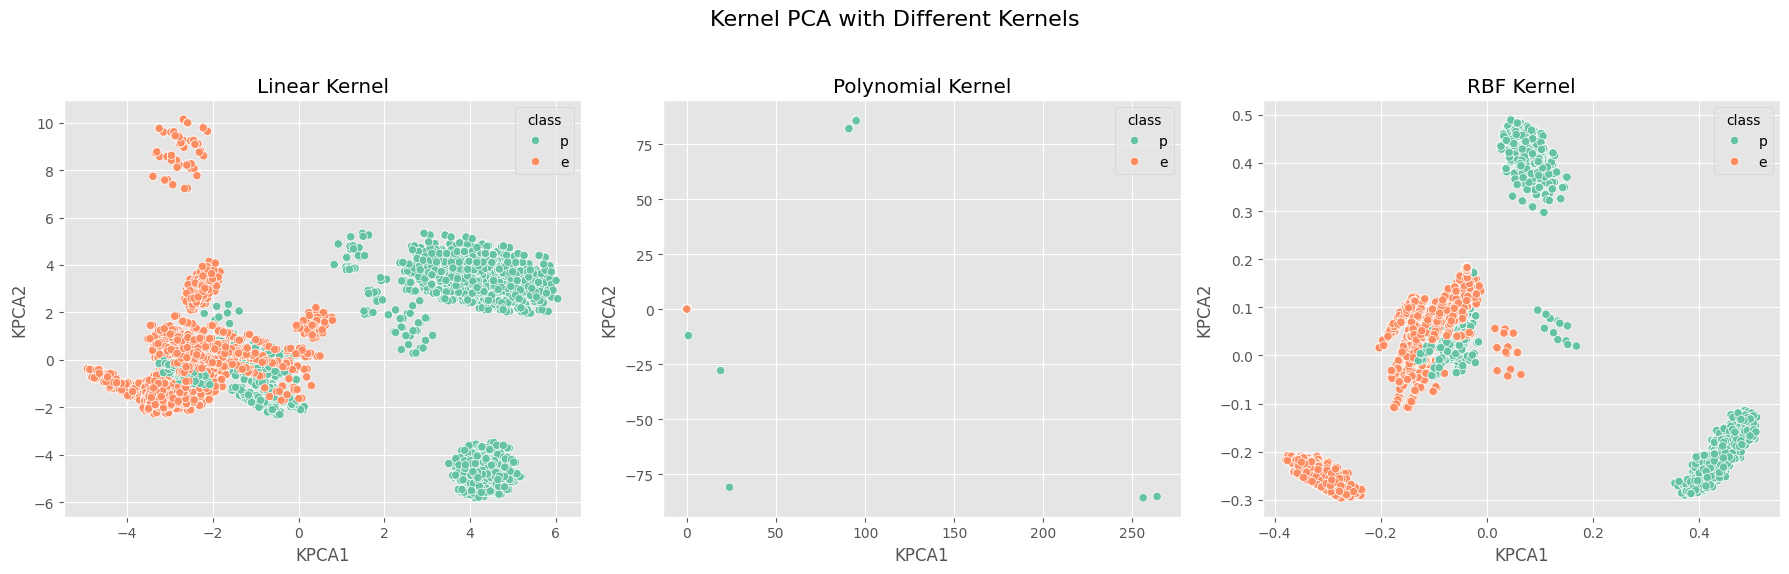

KPCA1,KPCA2,class
-2.199095,0.880128,p
-4.027017,-0.986567,e
-4.927930,-0.376416,e
-2.359698,0.192308,p
-3.072108,0.804739,e
KPCA1,KPCA2,class
-0.141198,-0.027109,p
-0.139565,-0.024917,e
-0.140393,-0.025414,e
-0.140612,-0.027343,p


In [6]:
from sklearn.decomposition import KernelPCA
from IPython.display import display, HTML

# Load the dataset
url = 'https://www.kaggle.com/datasets/uciml/mushroom-classification/data'
mushrooms = pd.read_csv('mushrooms.csv')

# Preprocessing: One-Hot Encoding of categorical features
mushrooms_encoded = pd.get_dummies(mushrooms)

# Standardize the features
scaler = StandardScaler()
mushrooms_scaled = scaler.fit_transform(mushrooms_encoded)

# Apply Kernel PCA with different kernels
def apply_kernel_pca(kernel, data, n_components=2):
    kpca = KernelPCA(n_components=n_components, kernel=kernel, gamma=None)
    kpca_results = kpca.fit_transform(data)
    return kpca_results

# Variations for different kernels
kpca_linear = apply_kernel_pca('linear', mushrooms_scaled)
kpca_poly = apply_kernel_pca('poly', mushrooms_scaled)
kpca_rbf = apply_kernel_pca('rbf', mushrooms_scaled)

# Create DataFrames for Kernel PCA results
kpca_linear_df = pd.DataFrame(kpca_linear, columns=['KPCA1', 'KPCA2'])
kpca_poly_df = pd.DataFrame(kpca_poly, columns=['KPCA1', 'KPCA2'])
kpca_rbf_df = pd.DataFrame(kpca_rbf, columns=['KPCA1', 'KPCA2'])

# Add the 'class' label for visualization
kpca_linear_df['class'] = mushrooms['class']
kpca_poly_df['class'] = mushrooms['class']
kpca_rbf_df['class'] = mushrooms['class']

# Plot the Kernel PCA results
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle('Kernel PCA with Different Kernels', fontsize=16)

sns.scatterplot(x='KPCA1', y='KPCA2', hue='class', data=kpca_linear_df, ax=axes[0], palette='Set2')
axes[0].set_title('Linear Kernel')

sns.scatterplot(x='KPCA1', y='KPCA2', hue='class', data=kpca_poly_df, ax=axes[1], palette='Set2')
axes[1].set_title('Polynomial Kernel')

sns.scatterplot(x='KPCA1', y='KPCA2', hue='class', data=kpca_rbf_df, ax=axes[2], palette='Set2')
axes[2].set_title('RBF Kernel')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Display the Kernel PCA results as tables
display(HTML("""
<table>
<tr>
    <td>""" + kpca_linear_df.head().to_html(index=False) + """</td>
    <td>""" + kpca_poly_df.head().to_html(index=False) + """</td>
    <td>""" + kpca_rbf_df.head().to_html(index=False) + """</td>
</tr>
</table>
"""))


## Conclusion

### Comparison Between KernelPCA and PCA

#### KernelPCA:
- **Linear Kernel**: Shows distinct clusters for edible and poisonous mushrooms, similar to PCA, but with a slightly different distribution.
- **Polynomial Kernel**: Displays a more complex clustering pattern, with tighter and more localized clusters.
- **RBF Kernel**: Exhibits a non-linear separation of classes with a clearer distinction, capturing complex relationships in the data.

#### PCA:
- **Principal Components**: Captures linear relationships and maximizes variance, providing a clear separation but limited to linear dependencies.
- **Interpretability**: Components are easier to interpret as they are linear combinations of original features.
- **Efficiency**: Computationally efficient and straightforward to implement, making it a reliable choice for initial analysis and feature extraction.

### Conclusion: KernelPCA vs. PCA for the Mushroom Dataset

For the Mushroom dataset, **KernelPCA** is a better choice for dimensionality reduction. Here's why:

1. **Non-Linear Relationships**:
   - **KernelPCA** can capture complex, non-linear relationships within the data, which are likely present in the Mushroom dataset given its diverse and categorical nature.
   - **PCA** is limited to linear relationships, which might miss subtle but important patterns in the data.

2. **Clustering and Class Separation**:
   - **KernelPCA** with RBF and polynomial kernels shows clearer and more distinct clusters for edible and poisonous mushrooms, indicating better separation of classes.
   - **PCA** provides good separation based on variance but is less effective at distinguishing non-linear patterns.

3. **Flexibility**:
   - **KernelPCA** offers flexibility with different kernel functions (e.g., linear, polynomial, RBF), allowing more tailored dimensionality reduction based on the dataset's characteristics.
   - **PCA** is a straightforward, one-size-fits-all approach that may not be optimal for all datasets.

4. **Effectiveness**:
   - The results from **KernelPCA** demonstrate a more nuanced understanding of the data structure, which is crucial for tasks requiring accurate feature representation and clustering.

While **PCA** is computationally efficient and easy to interpret, **KernelPCA** offers significant advantages for the Mushroom dataset by capturing non-linear relationships and improving class separation. This makes **KernelPCA** the preferable method for dimensionality reduction in this context. KernelPCA extends the capabilities of traditional PCA by using various kernel functions to uncover complex patterns, especially with kernels like RBF. For tasks requiring non-linear separation, **KernelPCA** is a better choice. 

However, for linear relationships and simplicity, **PCA** remains highly effective and explainable. Depending on the specific data characteristics and analysis goals, either method can be chosen, with **KernelPCA** providing enhanced flexibility for complex datasets. If computational resources and complexity are not major constraints, **KernelPCA** would be the optimal choice.